<a href="https://brahmbeyond.github.io/datascinece/" style="color: black; font-weight: bold; font-family:monospace">Home Page</a>

# Preprocessing

- Transform the data into format that is suitbale for machine learning algo or in other words - preparing the data for processing. 
Like preparing the dough before making chapati.

Like we have very varied form of data, the accuracy of the model will very likely becomes low.

- We will see the fundamental classes only -  StandardScaler,MinMaxScaler,RobustScaler,Binarizer,Normalizer,OneHotEncoder,LabelEncoder

In [ ]:
# Now lets create data for preprocessing using numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Binarizer,Normalizer,OneHotEncoder,LabelEncoder

In [18]:
np.random.seed(5)
a = np.random.normal(2,1,1000) 
b = np.random.normal(3,2,1000)
c = np.random.normal(-3,5,1000)

#in normal(2,1,100) 2 is mean ,1 is how wide data will be, 1000 is no of samples to generate


df = pd.DataFrame({
    'A':a,
    'B':b,
    'C':c
})
df

,A,B,C
0,2.441227,4.085538,-1.133022
1,1.669130,3.801825,8.502023
2,4.430771,4.439411,-13.309449
3,1.747908,2.956790,-1.545358
4,2.109610,3.048080,-2.422608
...,...,...,...
995,2.799389,5.783827,1.766070
996,2.773021,4.241227,-0.727714
997,1.945144,4.408467,5.043634
998,2.316907,0.628531,5.484778


<Axes: ylabel='Density'>

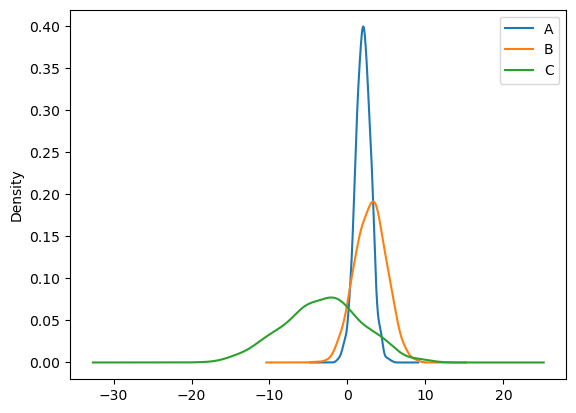

In [19]:
df.plot.kde()

above in graph we can see that there is very huge difference in all data. All data is varied and so we will use preprocessing techniques on it.

-----

In [ ]:
# now start with preprocessing techniques 
# all have same fit_transform class to transfer the dATA

## Normalization (min-max scalar)

In this the data is converted in the range of 0 and 1. All th data is transformed to be in range of 0 and 1. Like in above DataFrame we have 3 columns A,B,C. 
- the formula given below is to be applied on each of the sample in the table in each column.
- X is the sample , Xmin and Xmax is the min and max in that particular column like like we can we max in each column
```python
df.max()
    A    4.430771
    B    8.041615
    C    7.557442

```
- It goes column by column. 

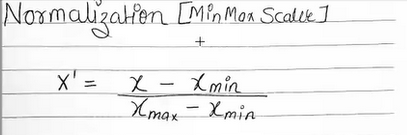

In [20]:
minmax = MinMaxScaler()
mm_scaled = minmax.fit_transform(df)
mm_scaled[:10]             # as it is saved as array, we are printing range till 10
# here you can the values are range 0 and 1

array([[0.54017061, 0.63293325, 0.59022656],
       [0.4282113 , 0.61076524, 0.9234703 ],
       [0.82866774, 0.66058318, 0.16908499],
       [0.43963464, 0.5447383 , 0.57596527],
       [0.49208384, 0.55187124, 0.54562413],
       [0.70566002, 0.77869459, 0.1591567 ],
       [0.34434491, 0.76118095, 0.74104267],
       [0.39039841, 0.23461908, 0.56065419],
       [0.5033934 , 0.61354087, 0.38867896],
       [0.42835633, 0.61239805, 0.61796229]])

In [21]:
# first convert into DataFrame from array so that we can plot graph for it
mdf = pd.DataFrame(mm_scaled,columns=['A','B','C'])
mdf.head(5)

,A,B,C
0,0.540171,0.632933,0.590227
1,0.428211,0.610765,0.923470
2,0.828668,0.660583,0.169085
3,0.439635,0.544738,0.575965
4,0.492084,0.551871,0.545624


<Axes: ylabel='Density'>

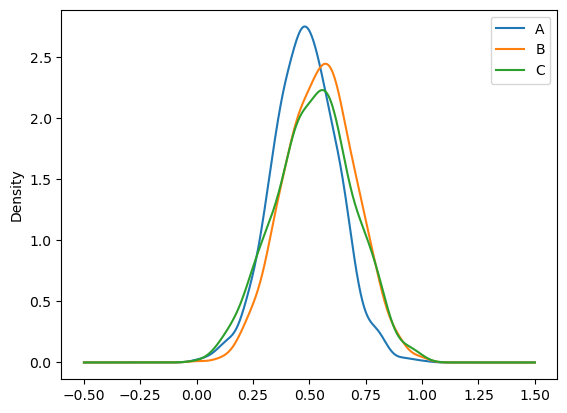

In [22]:
mdf.plot.kde()
# check the data is between 0 and 1  but in original unprocessed data the data was scattered.

-----------
-----

## Standardization (StandardScaler)

In this , it makes all the samples to follow one rule - mean should be 0 and standard deviation should be 1.
So by this all the samples will be comparable as they all will be having mean 0 and standard deviation 1.


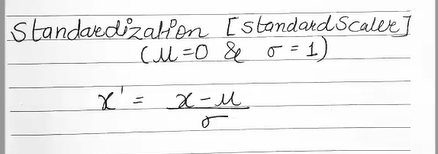

In [24]:
stdScaler = StandardScaler()
ss_scaled = stdScaler.fit_transform(df)
ss_scaled[:5]

array([[ 0.41211745,  0.55902179,  0.39695953],
       [-0.36786674,  0.4167435 ,  2.3083203 ],
       [ 2.42198325,  0.73648402, -2.01855016],
       [-0.28828405, -0.00702928,  0.3151621 ],
       [ 0.07711251,  0.03875116,  0.14113674]])

In [25]:
sdf = pd.DataFrame(ss_scaled,columns=['A','B','C'])
sdf.head(5)

,A,B,C
0,0.412117,0.559022,0.396960
1,-0.367867,0.416744,2.308320
2,2.421983,0.736484,-2.018550
3,-0.288284,-0.007029,0.315162
4,0.077113,0.038751,0.141137


<Axes: ylabel='Density'>

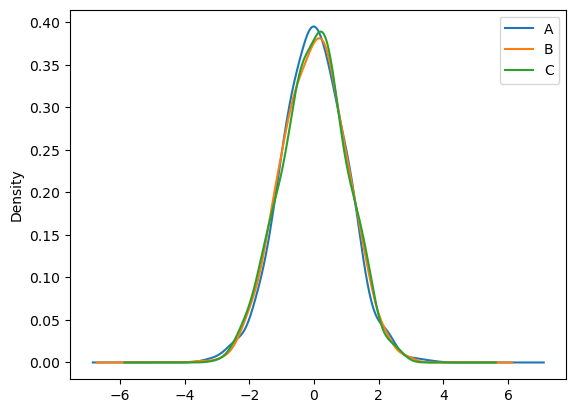

In [27]:
sdf.plot.kde()
#check the is almost overlapping so means almost perfectly comparable

----
----

## RobustScaler

    Robust means its associated with the outliers. With outliers you know how much the model training is affected.
    The values are most highly high or low. StandardScaler can deal with it but RobustScaler is perfect for this.
    It uses median and Interquatile Range(IQR) instead of mean and std. deviation

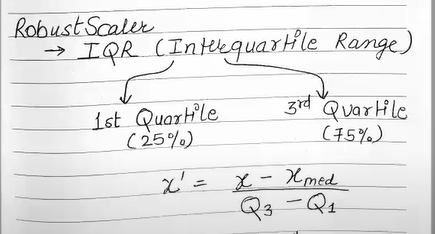

In [44]:
rscaler = RobustScaler()
r_scaled = rscaler.fit_transform(df)
r_scaled[:5]

array([[ 0.31505949,  0.38315297,  0.27124983],
       [-0.26758863,  0.27964914,  1.70197544],
       [ 1.81642906,  0.51225223, -1.53685024],
       [-0.20814037, -0.02863477,  0.21002138],
       [ 0.06481083,  0.00466934,  0.07975683]])

In [41]:
rdf = pd.DataFrame(r_scaled,columns=['A','B','C'])
rdf.head(5)

,A,B,C
0,0.315059,0.383153,0.271250
1,-0.267589,0.279649,1.701975
2,1.816429,0.512252,-1.536850
3,-0.208140,-0.028635,0.210021
4,0.064811,0.004669,0.079757


<Axes: ylabel='Density'>

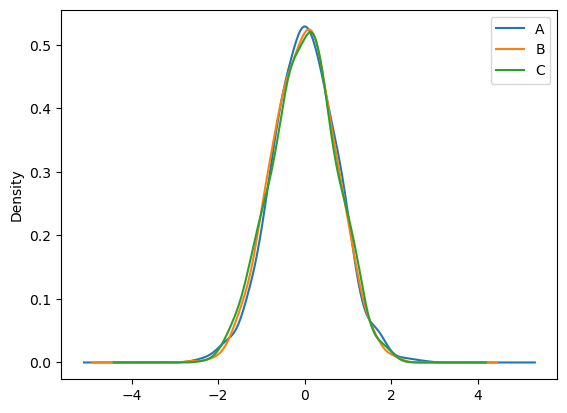

In [42]:
rdf.plot.kde()

#check A,B,C are more aligned to each other in this than Std. Scaler

------
-----

## Binarizer

    As per its name, it converts the whole data samples into binary digits 0 and 1. All depends on the threshold provided to it.The values above threshold are converted into 1 and below and same as threshold are converted into 0. Lets see in the code 

In [39]:
binary = Binarizer(threshold=5)

a = np.array([[ 30, 10,  22],
              [ 20,  2,  10],
              [ 33,  5, 5]])

bin_scaled = binary.fit_transform(a)
bin_scaled
#  you can see that when threshold is given 5 so the values below and including 5 are 0
# and values above 5 are 1

array([[1, 1, 1],
       [1, 0, 1],
       [1, 0, 0]])

-----
-----

## Normalizer

In this we will preprocess by row wise.
it rescales each feature to to have a unit norm (usually Euclidean norm, also known as L2 norm). This means that each feature vector is scaled to have a length of 1, which can be useful in certain machine learning algorithms.

**Imagine a circle**

Think of a circle with a radius of 1 unit. Any point on the circle has a distance of 1 unit from the center of the circle.

**Vectors as points on the circle**

Now, imagine that each feature vector is a point on this circle. The x and y coordinates of the point represent the values of the two features.

**Before normalization**

Before normalization, the points on the circle can have different distances from the center. Some points might be close to the center, while others are far away.

**Normalization**

Normalization is like moving each point on the circle to the edge of the circle, so that every point is exactly 1 unit away from the center. This means that each feature vector now has a length of 1 unit.

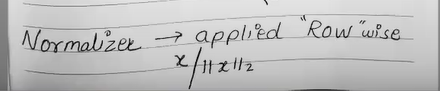

In [48]:
normalizer =  Normalizer()
t_normalizer = normalizer.fit_transform(a)      #array from above 
t_normalizer 

array([[0.7787612 , 0.25958707, 0.57109154],
       [0.89087081, 0.08908708, 0.4454354 ],
       [0.9778046 , 0.14815221, 0.14815221]])

------------
----

## LableEncoder & OneHotEncoder

When data is in string format but algo want only in numerical , so LableEncoder & OneHotEncoder comes in handy for convertinh the data into numerical for. 
This only works for categorical values.


In [34]:
#Lets first load the data from csv file.
dff = pd.read_csv('encoding.csv')
dff
#the file has Team column and has aphabst A,B,C which needs to converted into numbers. The conversion will be 0,1,2.

,TEAM,YEAR
0,A,2000
1,B,2002
2,C,2003
3,D,2004
4,A,2005
5,C,2006
6,B,2007
7,A,2008
8,D,2009


#### LabelEncoder

In this the changes will take place in the older place, means the alphabest will just exchanged with numbers. and other space will be occupied.

In [4]:
le = LabelEncoder()
dff1 = dff  #copy data 
dff1.TEAM = le.fit_transform(dff1.TEAM)
dff1

,TEAM,YEAR
0,0,2000
1,1,2002
2,2,2003
3,3,2004
4,0,2005
5,2,2006
6,1,2007
7,0,2008
8,3,2009


#### OneHotEncoder

In this it creates seperate columns for all the categories it is going to convert. so it covers more space.

What we will be doing is , as onehotencoder produces sparsh matrix by default , so unlike labelencoder we can't just directly make changes in the dataframe itsel. As I'm using dataframes here so what I'll do is
- First we will save the result(which is sparsh matrix generated here) into a variable on which onehotencoder is applied. We can check that by converting it into array.
- Then we can convert th resut into a dataframe and then we can join that dataframe and the original dataframe .
After that we can remove the string column as we don't need that now


In [54]:
ohe = OneHotEncoder()
dff2 = dff
team = ohe.fit_transform(dff2[['TEAM']])   #saved in form of sparsh matrix as by default produces sparsh matrix
team

<9x4 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [55]:
team.toarray()          #checking result

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [41]:
converted_df = pd.DataFrame(team.toarray(),columns=dff['TEAM'].unique())    #converting the result into a dataframe
# by using pandas and giving column names 
converted_df

,A,B,C,D
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0
7,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0


In [46]:
abc = dff.join(converted_df)   #joining both dataframes
abc

,TEAM,YEAR,A,B,C,D
0,A,2000,1.0,0.0,0.0,0.0
1,B,2002,0.0,1.0,0.0,0.0
2,C,2003,0.0,0.0,1.0,0.0
3,D,2004,0.0,0.0,0.0,1.0
4,A,2005,1.0,0.0,0.0,0.0
5,C,2006,0.0,0.0,1.0,0.0
6,B,2007,0.0,1.0,0.0,0.0
7,A,2008,1.0,0.0,0.0,0.0
8,D,2009,0.0,0.0,0.0,1.0


In [52]:
final  = abc.drop(['TEAM'],axis='columns')  #removing the extra 
final

,YEAR,A,B,C,D
0,2000,1.0,0.0,0.0,0.0
1,2002,0.0,1.0,0.0,0.0
2,2003,0.0,0.0,1.0,0.0
3,2004,0.0,0.0,0.0,1.0
4,2005,1.0,0.0,0.0,0.0
5,2006,0.0,0.0,1.0,0.0
6,2007,0.0,1.0,0.0,0.0
7,2008,1.0,0.0,0.0,0.0
8,2009,0.0,0.0,0.0,1.0
